# Introduction:

1. create the `w_axis` and `t_axis`;
2. create the separable spectrum;
3. generate simulations

In [19]:
from ktnsrm.KT import KT
from ktnsrm.SpecRepMethod import SRM
from ktnsrm.T_Envelop import Envelop
from ktnsrm.utils import EPSD_show, specgram3d, save2Vis

In [2]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# %matplotlib widget

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
# set up a global plt style for the script
plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        })

In [7]:
# instantiate the simulation object
simulation_obj = SRM(wu=100, N1=1024, fs=200, duration=8)

In [11]:
print(simulation_obj)

Frequency axis shape (1024,) and Time axis shape is (1600,)


## constructor for a Kanai Tajimi model

> Hint: need to specify a `w_axis` at run time

In [12]:
kt_model = KT(wg=5 * np.pi, zzeta = 0.63, S0 = 0.011)

In [13]:
kt_model.get_KT_psd(simulation_obj.w_axis_4simu)

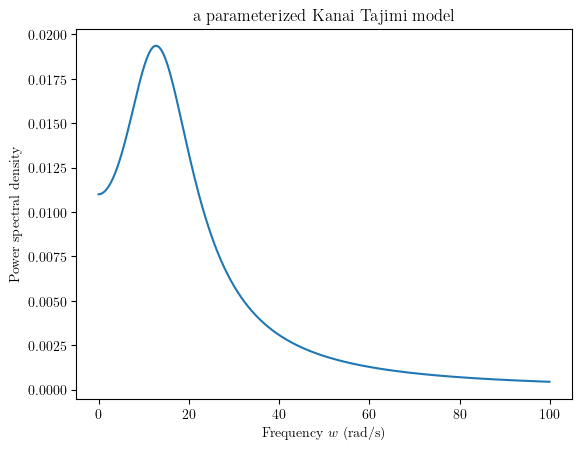

In [15]:
kt_model.plot_PSD(w_axis=simulation_obj.w_axis_4simu)

# save2Vis('PSD')

## An example simulation of associated KT model

the lower limit of sampling frequency: 32
the length of the simulation (1600,)


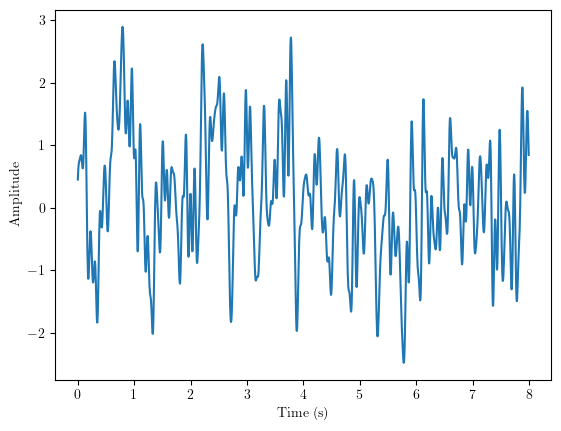

In [16]:
KT_simulation_amp = simulation_obj._SpecRepsentation0(kt_model.KT_PSD, plotting=True)

## A separable non-stationary spectra

In [24]:
# define the modulating function
envelop_obj = Envelop(t=simulation_obj.t_axis_4simu)

In [25]:
chosen_envelop = envelop_obj.get_envelop(key='liam15')

In [26]:
kt_model.cp_SepEpsd(envelopfuncObj=chosen_envelop,
                   t_axis=simulation_obj.t_axis_4simu)

the shape of the nonstationary spectra$S_{wt}$ (1024, 1600)


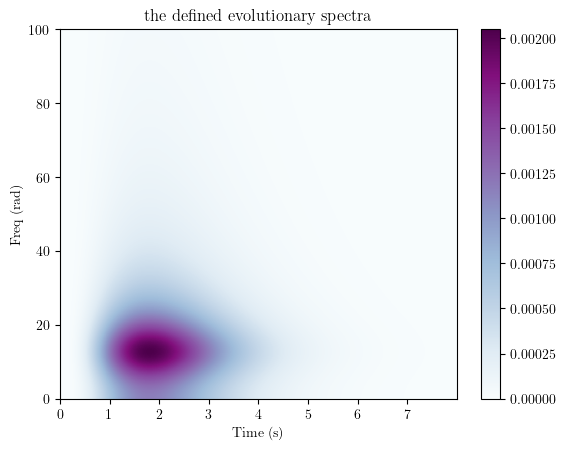

In [27]:
kt_model.EPSD_display(kt_model._sepEPSD, 
    simulation_obj.w_axis_4simu, 
    simulation_obj.t_axis_4simu, 
    format='2d',)

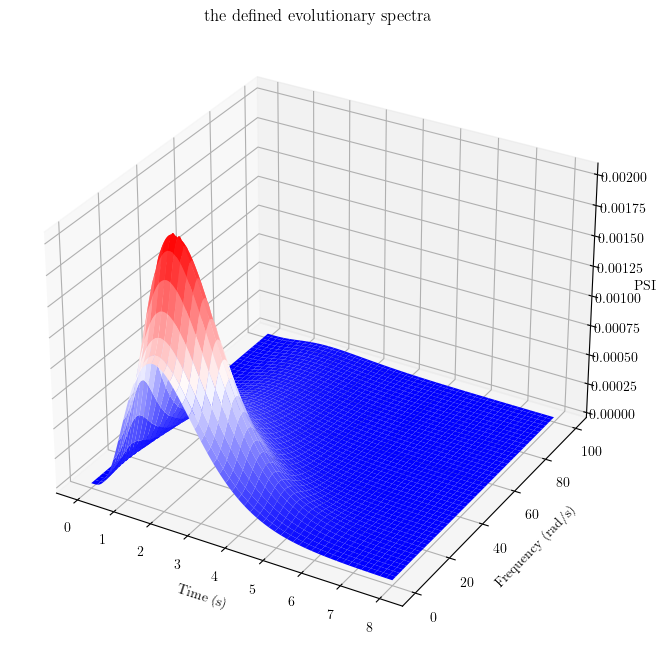

In [28]:
kt_model.EPSD_display(
    kt_model._sepEPSD, simulation_obj.w_axis_4simu, simulation_obj.t_axis_4simu, 
    format='3d',)

In [29]:
# save2Vis('nonseparableEPSD')

## An example simulation of associated evolutionary KT model

the lower limit of sampling frequency: 32
the length of the simulation (1600,)


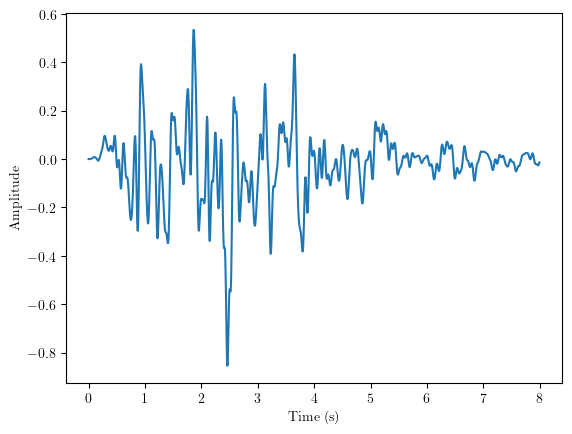

In [30]:
a_nonsta_simulation = simulation_obj._SpecRepsentation0(kt_model._sepEPSD, plotting=True)

## A customized non-separable non-stationary spectra

In [32]:
Liam15_nonsepEPSD = kt_model.cp_NonSepEpsd(simulation_obj.w_axis_4simu, simulation_obj.t_axis_4simu)

In [33]:
Liam15_nonsepEPSD.shape

(1024, 1600)

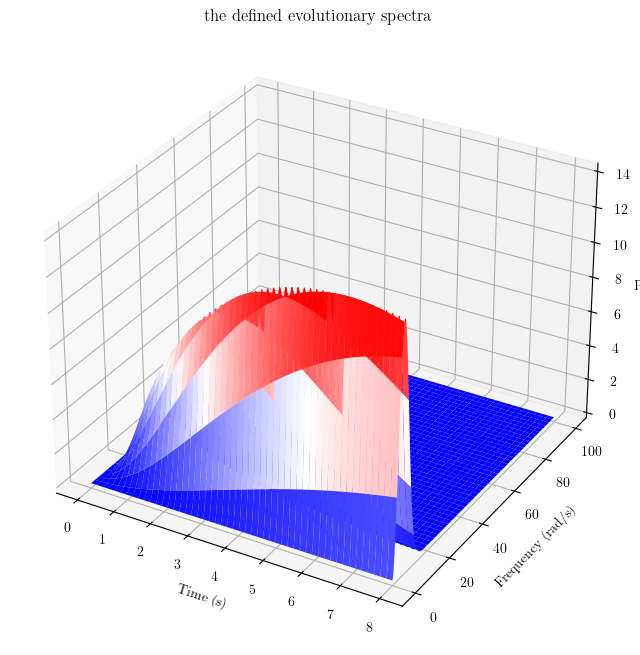

In [34]:
kt_model.EPSD_display(
    Liam15_nonsepEPSD, 
    simulation_obj.w_axis_4simu, 
    simulation_obj.t_axis_4simu, 
    format='3d',)

In [35]:
# save2Vis('separableEPSD')